        Name: Ashwini Giri          USC ID: 5413882039                 Team: Vectors

In [2]:
import pandas as pd
import numpy as np

import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('../data.csv')

In [4]:
data.shape

(260068750, 6)

In [4]:
data.head()

,Building,Level,ClientMacAddr,lat,lng,localtime
0,Gallery,Level5,38:ff:36:4c:1a:18,1.290866,103.851724,2018-07-31 18:20:29.538 UTC
1,Gallery,Level5,38:ff:36:4c:ad:23,1.290866,103.851724,2018-07-31 13:42:08.382 UTC
2,Gallery,Level5,38:ff:36:4c:ad:23,1.290866,103.851724,2018-07-31 14:58:17.652 UTC
3,Gallery,Level5,38:ff:36:4c:ae:53,1.290866,103.851724,2018-07-31 17:44:47.816 UTC
4,Gallery,Level5,38:ff:36:4c:b5:83,1.290866,103.851724,2018-07-31 13:26:17.971 UTC


In [5]:
data.columns

Index(['Building', 'Level', 'ClientMacAddr', 'lat', 'lng', 'localtime'], dtype='object')

In [5]:
data.drop('Building',inplace=True,axis=1)

In [6]:
data.columns

Index(['Level', 'ClientMacAddr', 'lat', 'lng', 'localtime'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260068750 entries, 0 to 260068749
Data columns (total 5 columns):
Level            object
ClientMacAddr    object
lat              float64
lng              float64
localtime        object
dtypes: float64(2), object(3)
memory usage: 9.7+ GB


In [ ]:
print('Number of unique MAC addresses in entire data: ',len(data['ClientMacAddr'].unique()))

In [ ]:
levels  = data.Level.value_counts()

In [12]:
print('Levels wise data')
levels

Levels wise data


Level 1     176288644
Level B1     78180446
Level5        5599660
Name: Level, dtype: int64

In [7]:
macaddresses = data.groupby('ClientMacAddr')[['ClientMacAddr']].count()

In [8]:
macaddresses['Count']=macaddresses['ClientMacAddr']

In [9]:
macaddresses.drop('ClientMacAddr',inplace=True,axis=1)

In [10]:
macaddresses.reset_index(inplace=True)

In [11]:
macaddresses.head()

,ClientMacAddr,Count
0,00:00:00:00:00:00,247
1,00:00:00:02:ce:28,10
2,00:00:00:17:91:90,10
3,00:00:00:51:1b:f3,65
4,00:00:15:31:8b:22,13


In [12]:
macaddresses.sort_values(by='Count',ascending=False,inplace=True)

In [13]:
macaddresses

,ClientMacAddr,Count
7446879,d4:6a:6a:60:d3:b1,989442
5886295,a8:81:95:69:cc:b0,774409
21542,02:18:6a:a5:42:50,766126
21544,02:18:6a:a6:58:d0,753764
21543,02:18:6a:a6:55:a0,730851
8480986,e0:b5:2d:b4:15:6d,647240
4064926,74:81:14:b3:02:c5,642785
5748097,a4:31:35:90:d5:fe,593220
7164356,cc:c7:60:68:8f:1d,561853
7582696,d8:0f:99:7a:5f:db,549102


In [14]:
ids = macaddresses.query('Count<=5')['ClientMacAddr']

In [15]:
ids_lst = ids.to_list()

In [16]:
data.head(2)

,Level,ClientMacAddr,lat,lng,localtime
0,Level5,38:ff:36:4c:1a:18,1.290866,103.851724,2018-07-31 18:20:29.538 UTC
1,Level5,38:ff:36:4c:ad:23,1.290866,103.851724,2018-07-31 13:42:08.382 UTC


In [17]:
print('length of full data: ',data.shape[0])
print('Number of MacAddresses to be deleted: ',len(ids_lst))

length of full data:  260068750
Number of MacAddresses to be deleted:  630012


In [18]:
#deleting the macids from dataset whose occurance is 3 or less
def remove_ids(full_data,lst):
    return full_data.loc[~full_data['ClientMacAddr'].isin(lst)]

In [19]:
removed_macid_data = remove_ids(data,ids_lst)

In [20]:
removed_macid_data.shape

(258090976, 5)

In [21]:
removed_macid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258090976 entries, 0 to 260068749
Data columns (total 5 columns):
Level            object
ClientMacAddr    object
lat              float64
lng              float64
localtime        object
dtypes: float64(2), object(3)
memory usage: 11.5+ GB


In [22]:
#function to convert localtime from string to datetime format
def convert_datetime(sample):
    sample['timestamp'] = pd.to_datetime(sample['localtime'].str.slice(0,19))
    return sample

In [23]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
dateconvert_data= convert_datetime(removed_macid_data)

In [25]:
dateconvert_data.shape

(258090976, 6)

In [26]:
dateconvert_data.head()

,Level,ClientMacAddr,lat,lng,localtime,timestamp
0,Level5,38:ff:36:4c:1a:18,1.290866,103.851724,2018-07-31 18:20:29.538 UTC,2018-07-31 18:20:29
1,Level5,38:ff:36:4c:ad:23,1.290866,103.851724,2018-07-31 13:42:08.382 UTC,2018-07-31 13:42:08
2,Level5,38:ff:36:4c:ad:23,1.290866,103.851724,2018-07-31 14:58:17.652 UTC,2018-07-31 14:58:17
3,Level5,38:ff:36:4c:ae:53,1.290866,103.851724,2018-07-31 17:44:47.816 UTC,2018-07-31 17:44:47
4,Level5,38:ff:36:4c:b5:83,1.290866,103.851724,2018-07-31 13:26:17.971 UTC,2018-07-31 13:26:17


In [27]:
dateconvert_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258090976 entries, 0 to 260068749
Data columns (total 6 columns):
Level            object
ClientMacAddr    object
lat              float64
lng              float64
localtime        object
timestamp        datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 13.5+ GB


In [28]:
dateconvert_data.drop('localtime',inplace=True,axis=1)

In [29]:
#feature engineering
def extract_features(df):
    df['hours'] = df['timestamp'].dt.hour
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.day
    # the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
    df['DayOfTheWeek'] = df['timestamp'].dt.dayofweek
    return df

In [30]:
data_with_features = extract_features(dateconvert_data)

In [31]:
data_with_features.head()

,Level,ClientMacAddr,lat,lng,timestamp,hours,month,day,DayOfTheWeek
0,Level5,38:ff:36:4c:1a:18,1.290866,103.851724,2018-07-31 18:20:29,18,7,31,1
1,Level5,38:ff:36:4c:ad:23,1.290866,103.851724,2018-07-31 13:42:08,13,7,31,1
2,Level5,38:ff:36:4c:ad:23,1.290866,103.851724,2018-07-31 14:58:17,14,7,31,1
3,Level5,38:ff:36:4c:ae:53,1.290866,103.851724,2018-07-31 17:44:47,17,7,31,1
4,Level5,38:ff:36:4c:b5:83,1.290866,103.851724,2018-07-31 13:26:17,13,7,31,1


In [38]:
data_with_features.groupby(['month','ClientMacAddr']).count()

Level     lat     lng  timestamp   hours     day  \
month ClientMacAddr                                                          
4     00:00:00:17:91:90      10      10      10         10      10      10   
      00:00:15:31:8b:22      13      13      13         13      13      13   
      00:00:4f:5f:8c:fd      31      31      31         31      31      31   
      00:00:56:8d:5d:b4      10      10      10         10      10      10   
      00:00:5a:83:f2:5a      18      18      18         18      18      18   
      00:00:66:00:23:b2      13      13      13         13      13      13   
      00:00:88:39:0d:fc      15      15      15         15      15      15   
      00:00:94:94:c7:7e      21      21      21         21      21      21   
      00:00:b9:82:ce:37      17      17      17         17      17      17   
      00:00:bc:1f:93:12       7       7       7          7       7       7   
      00:00:da:42:93:da       4       4       4          4       4       4   
      00:00:fa:80:37:fa      92      92      92         92      92      92   
      00:00:fd:19:ba:7d      20      20      20         20      20      20   
      00:03:ab:1d:e9:8a      17      17      17         17      17      17   
      00:03:ab:fe:8a:4a       9       9       9          9       9       9   
      00:04:4b:57:a9:fb      62      62      62         62      62      62   
      00:04:aa:31:d3:7b       9       9       9          9       9       9   
      00:05:34:54:63:1b      54      54      54         54      54      54   
      00:06:c7:01:8a:ea      89      89      89         89      89      89   
      00:06:c7:01:8b:c7      88      88      88         88      88      88   
      00:06:c7:01:8f:54       9       9       9          9       9       9   
      00:06:c7:01:8f:c8       4       4       4          4       4       4   
      00:06:c7:01:90:69     323     323     323        323     323     323   
      00:06:c7:01:91:e3      24      24      24         24      24      24   
      00:06:c7:01:92:91       9       9       9          9       9       9   
      00:06:c7:01:93:83      19      19      19         19      19      19   
      00:06:c7:01:94:c9       8       8       8          8       8       8   
      00:06:c7:01:96:5b      71      71      71         71      71      71   
      00:06:c7:01:98:c1      10      10      10         10      10      10   
      00:06:c7:01:98:f0       9       9       9          9       9       9   
...                         ...     ...     ...        ...     ...     ...   
7     fc:f8:ae:fd:42:6a  138601  138601  138601     138601  138601  138601   
      fc:f8:ae:fd:42:a1   46738   46738   46738      46738   46738   46738   
      fc:f8:ae:fd:6c:27   12754   12754   12754      12754   12754   12754   
      fc:f8:ae:fd:9b:de    7820    7820    7820       7820    7820    7820   
      fc:f8:ae:fd:9c:7e      61      61      61         61      61      61   
      fc:f8:ae:fd:a2:3c      37      37      37         37      37      37   
      fc:f8:ae:fd:a2:6e    9664    9664    9664       9664    9664    9664   
      fc:f8:ae:fd:a2:be     200     200     200        200     200     200   
      fc:f8:ae:fd:a2:c3    6567    6567    6567       6567    6567    6567   
      fc:f8:ae:fd:a3:81    4984    4984    4984       4984    4984    4984   
      fc:f8:ae:fd:af:11    1093    1093    1093       1093    1093    1093   
      fc:f8:ae:fd:c0:cd     410     410     410        410     410     410   
      fc:f8:ae:fd:c1:18    6788    6788    6788       6788    6788    6788   
      fc:fc:48:39:41:0c     610     610     610        610     610     610   
      fc:fc:48:8f:74:25      24      24      24         24      24      24   
      fc:fc:48:96:18:4a     254     254     254        254     254     254   
      fc:fc:48:98:dc:ce     508     508     508        508     508     508   
      fc:fc:48:9d:d9:b2      34      34      34         34      34      34   
      fc:fc:48:a1:58:95      91      91      91 

In [51]:
#Seperating employeees and visitors
full_employees = get_employees(data_with_features)
full_visitors = get_visitors(data_with_features)

In [54]:
employess_macid = list(full_employees.ClientMacAddr.unique())

In [56]:
print("Number of Employees: ",len(employess_macid))

Number of Employees:  908742


In [58]:
#seperating level wise data
level_B1 = full_visitors.loc[full_visitors['Level'] == 'Level B1']
level_1 = full_visitors.loc[full_visitors['Level'] == 'Level 1']
level_5 = full_visitors.loc[full_visitors['Level'] == 'Level5']

In [34]:
week_wise_count = data_with_features[['DayOfTheWeek','hours']]

In [37]:
week_wise_visitors = get_visitors(week_wise_count)

In [43]:
grouped = week_wise_visitors.groupby(['DayOfTheWeek','hours']).size().reset_index(name='counts')

In [45]:
mon = grouped.loc[grouped['DayOfTheWeek']==0]
tue = grouped.loc[grouped['DayOfTheWeek']==1]
wed = grouped.loc[grouped['DayOfTheWeek']==2]
thr = grouped.loc[grouped['DayOfTheWeek']==3]
fri = grouped.loc[grouped['DayOfTheWeek']==4]
sat = grouped.loc[grouped['DayOfTheWeek']==5]
sun = grouped.loc[grouped['DayOfTheWeek']==6]

In [47]:
mon.drop('DayOfTheWeek',inplace=True,axis=1)
tue.drop('DayOfTheWeek',inplace=True,axis=1)
wed.drop('DayOfTheWeek',inplace=True,axis=1)
thr.drop('DayOfTheWeek',inplace=True,axis=1)
fri.drop('DayOfTheWeek',inplace=True,axis=1)
sat.drop('DayOfTheWeek',inplace=True,axis=1)
sun.drop('DayOfTheWeek',inplace=True,axis=1)

In [57]:
mon.to_csv('mon.csv')
tue.to_csv('tue.csv')
wed.to_csv('wed.csv')
thr.to_csv('thr.csv')
fri.to_csv('fri.csv')
sat.to_csv('sat.csv')
sun.to_csv('sun.csv')

In [59]:
print('number of rows in full data: ',data_with_features.shape[0])
print('number of rows in level B1 data: ',level_B1.shape[0])
print('number of rows in Level 1 data: ',level_1.shape[0])
print('number of rows in Level 5 data: ',level_5.shape[0])
print('addition: ',level_B1.shape[0]+level_1.shape[0]+level_5.shape[0])

number of rows in full data:  258090976
number of rows in level B1 data:  61481433
number of rows in Level 1 data:  145848769
number of rows in Level 5 data:  3070908
addition:  210401110


In [64]:
level_5_train = level_5.sample(n=100000, random_state=1)
level_5_test = level_5.sample(n=1000, random_state=1)
level_1_train = level_1.sample(n=100000, random_state=1)
level_1_test = level_1.sample(n=1000, random_state=1)
level_B1_train = level_B1.sample(n=100000, random_state=1)
level_B1_test = level_B1.sample(n=1000, random_state=1)

In [65]:
level_1_train.to_csv('level_1_train.csv')
level_1_test.to_csv('level_1_test.csv')
level_5_train.to_csv('level_5_train.csv')
level_5_test.to_csv('level_5_test.csv')
level_B1_train.to_csv('level_B1_train.csv')
level_B1_test.to_csv('level_B1_test.csv')

In [60]:
level_B1.head()

,Level,ClientMacAddr,lat,lng,timestamp,hours,month,day,DayOfTheWeek
1824073,Level B1,88:75:98:3a:ee:e6,1.290261,103.851583,2018-07-20 17:41:29,17,7,20,4
1824074,Level B1,88:75:98:42:7e:83,1.290107,103.851495,2018-07-20 18:55:09,18,7,20,4
1824075,Level B1,88:75:98:4f:af:6d,1.290913,103.852001,2018-07-20 14:11:58,14,7,20,4
1824076,Level B1,88:75:98:56:29:76,1.290917,103.852003,2018-07-20 13:54:49,13,7,20,4
1824077,Level B1,88:75:98:56:29:76,1.290918,103.852004,2018-07-20 14:19:07,14,7,20,4


In [61]:
level_B1.drop('Level',inplace=True,axis=1)
level_1.drop('Level',inplace=True,axis=1)
level_5.drop('Level',inplace=True,axis=1)
level_B1.reset_index(inplace=True,drop=True)
level_1.reset_index(inplace=True,drop=True)
level_5.reset_index(inplace=True,drop=True)

In [62]:
level_5.columns

Index(['ClientMacAddr', 'lat', 'lng', 'timestamp', 'hours', 'month', 'day',
       'DayOfTheWeek'],
      dtype='object')

In [44]:
from sklearn.preprocessing import StandardScaler
lat_lng_level5 = level_5[['lat','lng']]

In [45]:
lat_lng_level5.head()

,lat,lng
0,1.290866,103.851724
1,1.290866,103.851724
2,1.290866,103.851724
3,1.290866,103.851724
4,1.290866,103.851724


In [46]:
scaled_data = StandardScaler().fit(lat_lng_level5)
scaled_data

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
print(scaled_data.mean_)
print(scaled_data.scale_ )
transfromed_data = scaled_data.transform(lat_lng_level5) 

[  1.29077355 103.8516505 ]
[1.04519681e-04 7.30802729e-05]


In [48]:
scaled = pd.DataFrame({'lat':transfromed_data[:,0],'lng':transfromed_data[:,1]})

In [49]:
scaled.head()

,lat,lng
0,0.885891,1.004624
1,0.885891,1.004624
2,0.885891,1.004624
3,0.885891,1.004624
4,0.885891,1.004624


In [50]:
level_5['newlat'],level_5['newlng'] = scaled['lat'],scaled['lng']

In [51]:
level_5.head()

,ClientMacAddr,lat,lng,timestamp,hours,month,day,DayOfTheWeek,newlat,newlng
0,38:ff:36:4c:1a:18,1.290866,103.851724,2018-07-31 18:20:29,18,7,31,1,0.885891,1.004624
1,38:ff:36:4c:ad:23,1.290866,103.851724,2018-07-31 13:42:08,13,7,31,1,0.885891,1.004624
2,38:ff:36:4c:ad:23,1.290866,103.851724,2018-07-31 14:58:17,14,7,31,1,0.885891,1.004624
3,38:ff:36:4c:ae:53,1.290866,103.851724,2018-07-31 17:44:47,17,7,31,1,0.885891,1.004624
4,38:ff:36:4c:b5:83,1.290866,103.851724,2018-07-31 13:26:17,13,7,31,1,0.885891,1.004624


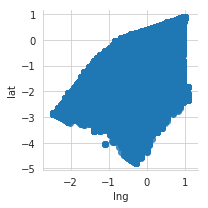

In [52]:
#level wise analysis and some visualizations
import seaborn as sns
sns.set_style('whitegrid')
sns.lmplot('lng','lat',data=scaled,
           palette='coolwarm',size=3,aspect=1,fit_reg=False)

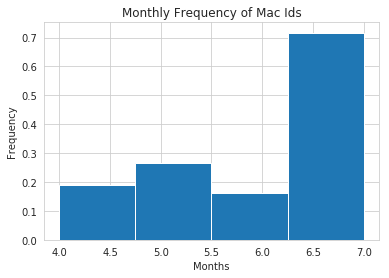

In [53]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(level_5['month'], normed=1,bins=4)
plt.title('Monthly Frequency of Mac Ids')
plt.xlabel('Months')
plt.ylabel('Frequency');

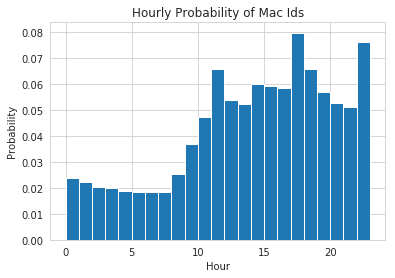

In [54]:
plt.hist(level_5['hours'], normed=True,bins=23)
plt.title('Hourly Probability of Mac Ids')
plt.xlabel('Hour')
plt.ylabel('Probability');

In [55]:
level_5.month.unique()

array([7, 6, 5, 4])

In [56]:
level_5_month_4 = level_5.loc[level_5['month'] == 4]
level_5_month_5 = level_5.loc[level_5['month'] == 5]
level_5_month_6 = level_5.loc[level_5['month'] == 6]
level_5_month_7 = level_5.loc[level_5['month'] == 7]

In [57]:
print('Total count in level 5: ',level_5.shape[0])
print('Level 5 month 4: ',level_5_month_4.shape[0])
print('Level 5 month 5: ',level_5_month_5.shape[0])
print('Level 5 month 6: ',level_5_month_6.shape[0])
print('Level 5 month 7: ',level_5_month_7.shape[0])
print('Check total: ',level_5_month_4.shape[0]+level_5_month_5.shape[0]+level_5_month_6.shape[0]+level_5_month_7.shape[0])

Total count in level 5:  5577485
Level 5 month 4:  795243
Level 5 month 5:  1112447
Level 5 month 6:  671917
Level 5 month 7:  2997878
Check total:  5577485


In [58]:
level_5_month_4.head()

,ClientMacAddr,lat,lng,timestamp,hours,month,day,DayOfTheWeek,newlat,newlng
30058,70:81:eb:c6:17:11,1.290779,103.851616,2018-04-15 21:08:06,21,4,15,6,0.051215,-0.472108
30071,48:5a:3f:12:29:70,1.290769,103.851616,2018-04-11 09:44:21,9,4,11,2,-0.041590,-0.472108
30072,70:81:eb:c6:17:11,1.290777,103.851616,2018-04-11 13:14:00,13,4,11,2,0.031123,-0.472108
30078,48:5a:3f:12:29:70,1.290789,103.851616,2018-04-11 11:52:45,11,4,11,2,0.143064,-0.472108
30080,9a:a7:9e:4e:1a:9f,1.290539,103.851616,2018-04-11 13:52:34,13,4,11,2,-2.243089,-0.472108


In [59]:
level_5_month_4.reset_index(inplace=True,drop=True)
level_5_month_5.reset_index(inplace=True,drop=True)
level_5_month_6.reset_index(inplace=True,drop=True)
level_5_month_7.reset_index(inplace=True,drop=True)

In [60]:
level_5_month_4.head()

,ClientMacAddr,lat,lng,timestamp,hours,month,day,DayOfTheWeek,newlat,newlng
0,70:81:eb:c6:17:11,1.290779,103.851616,2018-04-15 21:08:06,21,4,15,6,0.051215,-0.472108
1,48:5a:3f:12:29:70,1.290769,103.851616,2018-04-11 09:44:21,9,4,11,2,-0.041590,-0.472108
2,70:81:eb:c6:17:11,1.290777,103.851616,2018-04-11 13:14:00,13,4,11,2,0.031123,-0.472108
3,48:5a:3f:12:29:70,1.290789,103.851616,2018-04-11 11:52:45,11,4,11,2,0.143064,-0.472108
4,9a:a7:9e:4e:1a:9f,1.290539,103.851616,2018-04-11 13:52:34,13,4,11,2,-2.243089,-0.472108


In [61]:
level_5_month_4.to_csv('level4month4.csv')

In [62]:
level_5_month_5.to_csv('level5month5.csv')
level_5_month_6.to_csv('level5month6.csv')
level_5_month_7.to_csv('level5month7.csv')

In [63]:
from mpl_toolkits.mplot3d import Axes3D

In [64]:
level_5_month_4.DayOfTheWeek.value_counts()

0    131178
1    127656
6    119592
2    116186
3    114292
4    100307
5     86032
Name: DayOfTheWeek, dtype: int64

In [65]:
level_5_month_4.hours.value_counts()

17    64668
11    57582
18    56362
15    48993
12    48863
16    46810
14    46784
10    43480
19    42938
13    41667
20    39461
22    36542
21    35902
9     35401
23    27738
8     21504
0     19751
1     15455
3     12022
4     11575
7     10999
2     10770
5     10614
6      9362
Name: hours, dtype: int64

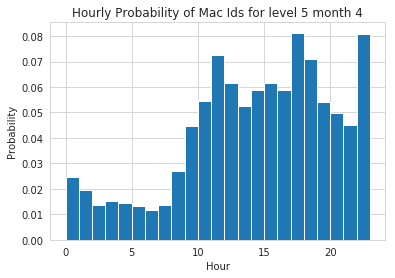

In [66]:
plt.hist(level_5_month_4['hours'], normed=True,bins=23)
plt.title('Hourly Probability of Mac Ids for level 5 month 4')
plt.xlabel('Hour')
plt.ylabel('Probability');

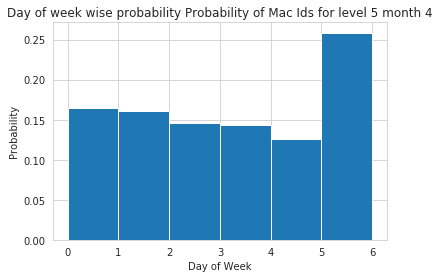

In [67]:
plt.hist(level_5_month_4['DayOfTheWeek'], normed=True,bins=6)
plt.title('Day of week wise probability Probability of Mac Ids for level 5 month 4')
plt.xlabel('Day of Week')
plt.ylabel('Probability');

Scatter plot for Level 5 month 4


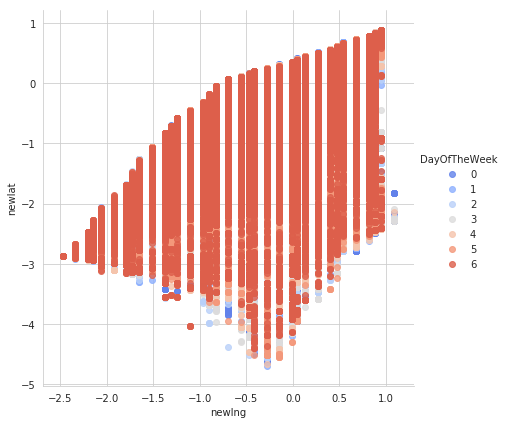

In [68]:
#level wise analysis and some visualizations
import seaborn as sns
print('Scatter plot for Level 5 month 4')
sns.set_style('whitegrid')
sns.lmplot('newlng','newlat',data=level_5_month_4,hue='DayOfTheWeek',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

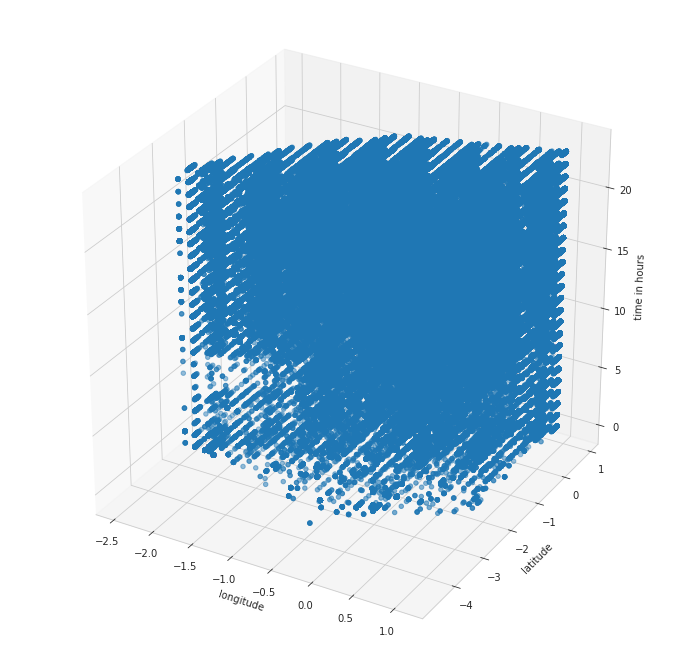

In [69]:
threedee = plt.figure(figsize=(12,12)).gca(projection='3d')
threedee.scatter(level_5_month_4['newlng'], level_5_month_4['newlat'], level_5_month_4['hours'])
threedee.set_xlabel('longitude')
threedee.set_ylabel('latitude')
threedee.set_zlabel('time in hours')
plt.show()

In [49]:
#seperating employee vs visitors
def get_employees(df):
    friday = df[((df['hours']<10) | (df['hours']>21))&(df['DayOfTheWeek']==4)]
    sat_thurs = df[((df['hours']<10) | (df['hours']>19))&(df['DayOfTheWeek']!=4)]
    return pd.concat([friday, sat_thurs], axis=0)

In [50]:
def get_visitors(df):
    friday = df[((df['hours']>=10) & (df['hours']<=20))&(df['DayOfTheWeek']==4)]
    sat_thurs = df[((df['hours']>=10) & (df['hours']<=18))&(df['DayOfTheWeek']!=4)]
    return pd.concat([friday, sat_thurs], axis=0)

In [72]:
employees = get_employees(level_5_month_4)
visitors = get_visitors(level_5_month_4)

In [73]:
employees.hours.unique()

array([ 5,  6, 23,  1,  4,  3,  2,  0,  8,  9, 22,  7, 21, 20])

In [74]:
visitors.hours.unique()

array([10, 11, 12, 18, 14, 20, 13, 16, 15, 19, 17])

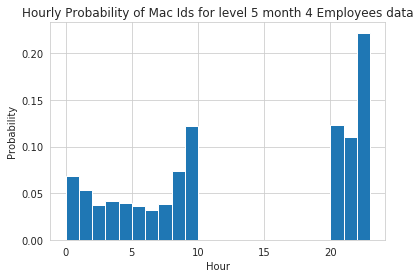

In [75]:
plt.hist(employees['hours'], normed=True,bins=23)
plt.title('Hourly Probability of Mac Ids for level 5 month 4 Employees data')
plt.xlabel('Hour')
plt.ylabel('Probability');

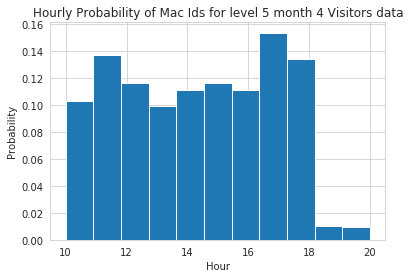

In [76]:
plt.hist(visitors['hours'], normed=True,bins=11)
plt.title('Hourly Probability of Mac Ids for level 5 month 4 Visitors data')
plt.xlabel('Hour')
plt.ylabel('Probability');

Graph for visitors level 5 month 4


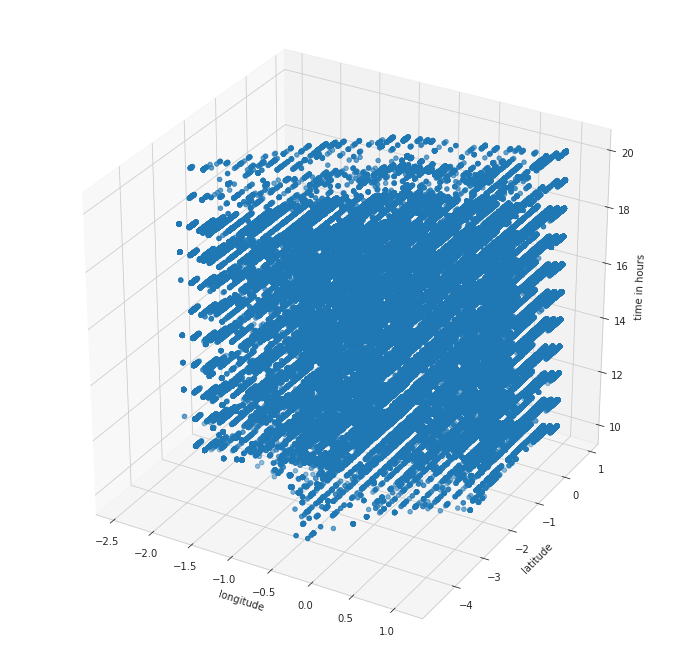

In [77]:
print('Graph for visitors level 5 month 4')
threedee = plt.figure(figsize=(12,12)).gca(projection='3d')
threedee.scatter(visitors['newlng'], visitors['newlat'], visitors['hours'])
threedee.set_xlabel('longitude')
threedee.set_ylabel('latitude')
threedee.set_zlabel('time in hours')
plt.show()

In [79]:
employees.to_csv('employees.csv')
visitors.to_csv('visitors.csv')

Graph for Employees level 5 month 4


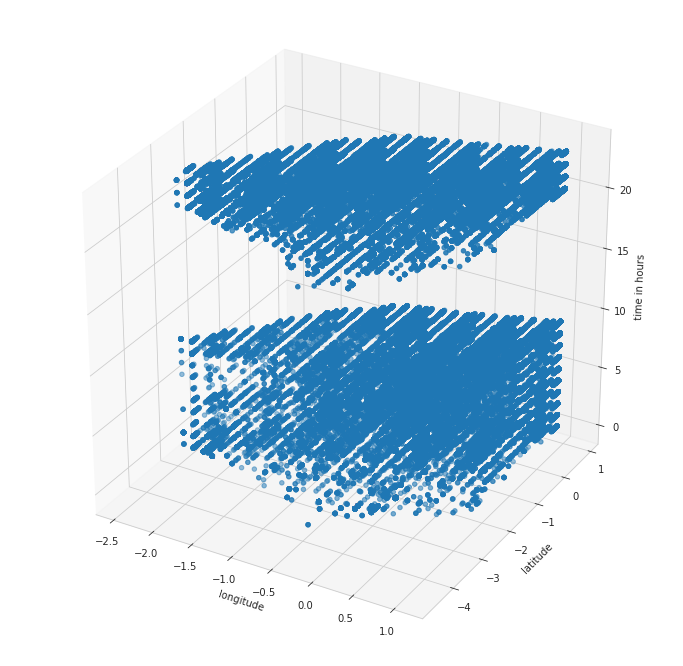

In [78]:
print('Graph for Employees level 5 month 4')
threedee = plt.figure(figsize=(12,12)).gca(projection='3d')
threedee.scatter(employees['newlng'], employees['newlat'], employees['hours'])
threedee.set_xlabel('longitude')
threedee.set_ylabel('latitude')
threedee.set_zlabel('time in hours')
plt.show()

In [73]:
day_wise_count = level_5.groupby(['day','hours']).count()

In [74]:
day_wise_count.reset_index(inplace=True)

In [75]:
day_wise_count.columns

Index(['day', 'hours', 'ClientMacAddr', 'lat', 'lng', 'timestamp', 'month',
       'DayOfTheWeek', 'newlat', 'newlng'],
      dtype='object')

In [76]:
day_wise_count.drop(['lat', 'lng', 'timestamp', 'month',
       'DayOfTheWeek', 'newlat', 'newlng'],axis=1, inplace=True)

In [78]:
day_wise_count['Count'] = day_wise_count['ClientMacAddr']
day_wise_count.drop('ClientMacAddr',inplace=True,axis=1)

In [79]:
day_wise_count.head()

,day,hours,Count
0,1,0,1974
1,1,1,1399
2,1,2,936
3,1,3,849
4,1,4,1132
